1. Radioactive decay chain

 decays to 
 with a half-life 
 of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability 
. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time
Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution 
 
 to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

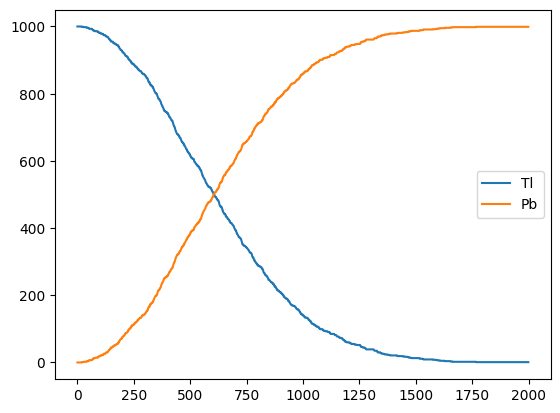

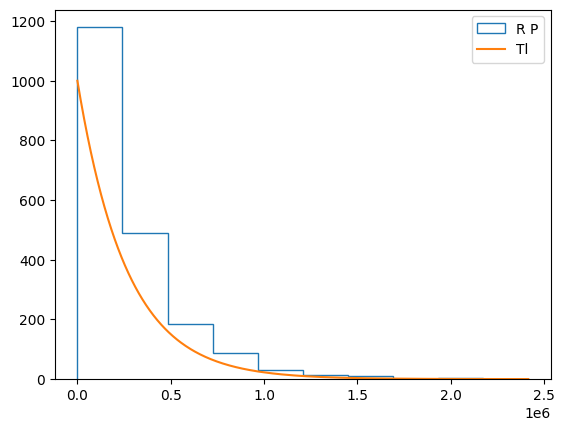

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ta = 3052 * 60  
n_atom = 1000  
tl = [n_atom]
pb = [0]
def p(t, tau):
    return 1 - 2**(-t/tau)

N_steps = 2000

for t in range(1, N_steps):

    a = np.random.random(tl[-1])
    
    decayed = np.sum(a < p(t, ta)) 
    
    
    tl.append(tl[-1] - decayed)
    pb.append(pb[-1] + decayed)
    
plt.plot(tl, label = "Tl")
plt.plot(pb, label = "Pb")
plt.legend()
plt.show()


def inverse_p2(x):
    return -ta*np.log2(1 - x)

un = np.random.random(N_steps)
x = inverse_p2(un)


plt.hist(x, histtype = 'step', label="R P")
plt.plot(np.sort(x), (1 - (np.sort(un)))*1000, label = "Tl")
plt.legend()
plt.show()


2. Monte Carlo integration: hit/miss vs mean value method



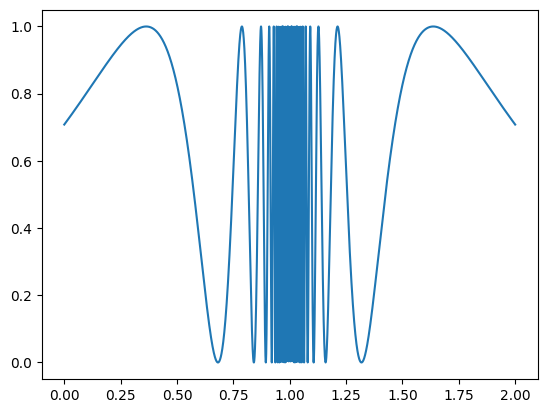

with hit and miss method:
Mean of integral of f(x) :  1.346882
Standard Deviation of integral of f(x) : 0.0009568117683222759

Mean of f(x) integral  ( mean value ): 1.3571404909456333

Integral reference value calculated with trapz: 1.3476352527116469
Error of hit and miss method: 0.0007532527116469456
Error of mean value method: 0.009505238233986413


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(1/(1-x))**2

N = 10000

x = np.linspace(0, 2, N)
y = f(x)
plt.plot(x, y)
plt.show()

integ = []
s = 100
for a in range(s):
    count = 0
    for i in range(N):
        x = 2 * np.random.random() 
        y = np.random.random()     
        if y < f(x): count += 1
    I = 2 * count / N
    integ.append(I)

m = np.mean(integ) 
dev = np.std(integ)/np.sqrt(s) 
print("with hit and miss method:")
print(f"Mean of integral of f(x) :  {m}")
print(f"Standard Deviation of integral of f(x) : {dev}")



x_ran = np.random.uniform(0, 2, N)
y_ran = f(x_ran)
m_p = 2*np.mean(f(x_ran)) 
dev_p = np.std(y_ran)/np.sqrt(N) 
print(f"\nMean of f(x) integral  ( mean value ): {m_p}")

x = np.linspace(0, 2, N)
Integral_ref = np.trapz(f(x) ,x)

err_hitmiss = np.abs(Integral_ref-m)
err_meanval = np.abs(Integral_ref-m_p)

print(f"\nIntegral reference value calculated with trapz: {Integral_ref}")
print(f"Error of hit and miss method: {err_hitmiss}")
print(f"Error of mean value method: {err_meanval}")

#the hit and miss is more accurate

3 Monte Carlo integration in high dimension

Compute the area of a circle of unit radius, by integrating the function:
 
Generalize the result for a 10D sphere.

In [3]:
import numpy as np

N = 100000


x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

c = 0
for i in range(N):
    if x[i]**2 + y[i]**2 <= 1:
        c += 1

area = 4*c/N
print("The area of the circle of unit radius :", area)


dimention = 10

x_d = np.random.uniform(-1, 1, (N, dimention))

cd = 0
for i in range(N):
    s = 0
    for j in range(dimention):
        s += x_d[i, j]**2
    if s <= 1:
        cd += 1

area_D = (2**dimention*cd)/N

print(f"The area of the sphere of dimension {dimention} is: {area_D}")

The area of the circle of unit radius : 3.1404
The area of the sphere of dimension 10 is: 2.65216


4 . Monte Carlo integration with importance sampling



In [5]:

def fun1(x):
    return (x**(-1/2))/(np.exp(x)+1)

def fun2(x):
    return 1/np.sqrt(x)

n = 100000

x0 = np.random.random(n) 
w_integral = np.sum(fun2(x0))/n

x_1 = np.random.uniform(0, 1, n)**2
Ires = (np.sum(fun1(x_1)/fun2(x_1))*w_integral)/n

print(f"The integral value is {Ires}")

The integral value is 0.8493232269280584
